<a href="https://colab.research.google.com/github/Soumyadip3007/Image_Processing/blob/main/GIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE:**  *GIST* features are *global image descriptors* that capture the spatial structure and texture of an image using *Gabor filters* at multiple scales and orientations. They provide a compact representation of an image, making them useful for scene classification, image retrieval, and clustering. Unlike local descriptors, GIST focuses on the overall scene layout rather than specific objects. These features help in dimensionality reduction while preserving essential image information. They are widely used in *content-based image retrieval (CBIR)*, anomaly detection, and object recognition when combined with other features. GIST features enable efficient comparison of images based on their spatial composition.


In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## set of Gabor filter kernels at different scales and orientations.

In [37]:
def generate_gabor_kernels(scales=4, orientations=8, kernel_size=21, sigma=3.0):
  kernels=[]
  for s in range(scales):
    for theta in range(orientations):
      theta_rad=np.pi*theta/orientations
      lamda=4.0*(2**s)
      gamma=0.5
      kernel=cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta_rad,lamda,gamma,0,ktype=cv2.CV_32F)
      kernels.append(kernel)
  return kernels

## Applies Gabor filters to an image and returns the filtered responses

In [38]:
def apply_gabor_filters(image, kernels):
    responses = []
    for kernel in kernels:
        filtered = convolve(image, kernel)  # Apply convolution
        responses.append(filtered)
    return np.array(responses)

## Visualization of the Gabor filters

---



In [39]:
def visualize_gabor_kernels(kernels, scales=4, orientations=8):
    fig, axes = plt.subplots(scales, orientations, figsize=(12, 6))
    fig.suptitle("Gabor Filter Kernels", fontsize=14)

    for i, kernel in enumerate(kernels):
        row, col = divmod(i, orientations)
        axes[row, col].imshow(kernel, cmap='gray')
        axes[row, col].axis('off')

    plt.show()

## Visualization of the Gabor filters output on image

---



In [40]:
def visualize_gabor_responses(image, responses, scales=4, orientations=8):
    fig, axes = plt.subplots(scales, orientations, figsize=(12, 6))
    fig.suptitle("Filtered Image Responses", fontsize=14)

    for i, response in enumerate(responses):
        row, col = divmod(i, orientations)
        axes[row, col].imshow(response, cmap='gray')
        axes[row, col].axis('off')

    plt.show()

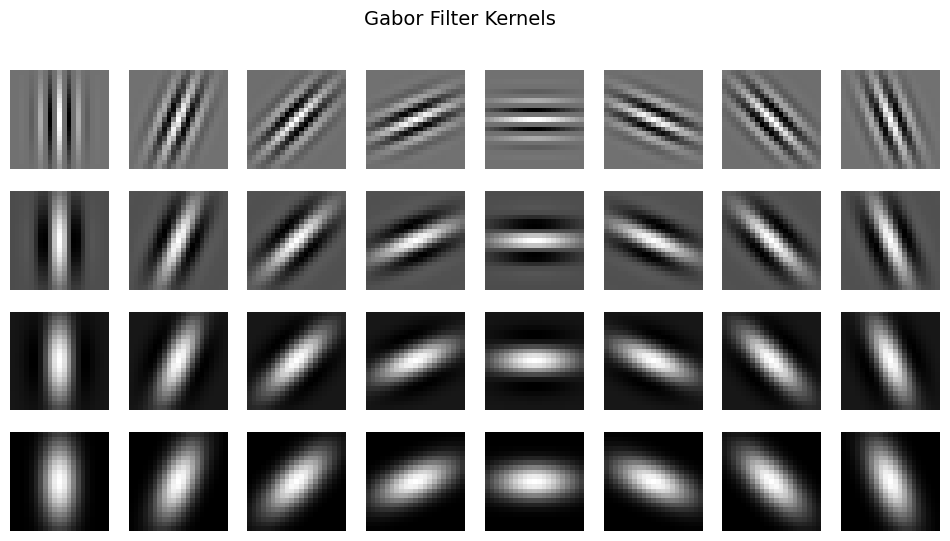

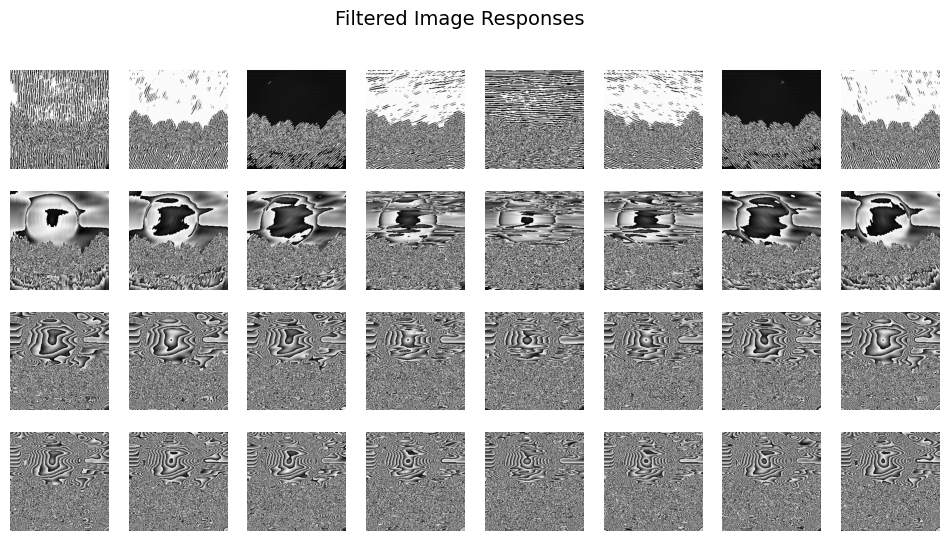

In [41]:
image = cv2.imread("sample_image.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))

kernels = generate_gabor_kernels()

visualize_gabor_kernels(kernels)

responses = apply_gabor_filters(image, kernels)

visualize_gabor_responses(image, responses)

In [42]:
def extract_gist_features(image, grid_size=(4, 4), scales=4, orientations=8):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (256, 256))  # Standardize size

    # Generate Gabor kernels
    kernels = generate_gabor_kernels(scales, orientations)

    # Apply Gabor filters
    responses = apply_gabor_filters(image, kernels)

    # Divide into grid cells and compute mean response
    h, w = image.shape
    gh, gw = grid_size
    cell_h, cell_w = h // gh, w // gw

    gist_descriptor = []
    for response in responses:
        for i in range(gh):
            for j in range(gw):
                grid_cell = response[i * cell_h:(i + 1) * cell_h, j * cell_w:(j + 1) * cell_w]
                gist_descriptor.append(np.mean(grid_cell))  # Compute mean per cell

    return np.array(gist_descriptor)


In [43]:
gist_features = extract_gist_features(image)

print("GIST Descriptor Shape:", gist_features.shape)  # Expected: (512,)
print("GIST Features:", gist_features)

GIST Descriptor Shape: (512,)
GIST Features: [154.97924805 166.18310547 154.98754883 138.92260742 155.97265625
 166.13330078 153.44506836 155.97924805 127.77612305 129.671875
 131.50341797 127.46118164 128.49389648 127.20800781 129.85717773
 122.421875   234.69360352 247.89526367 241.7253418  243.93579102
 220.96191406 245.63500977 239.72265625 228.90405273 130.0559082
 139.39379883 143.95141602 134.13891602 129.09692383 130.55688477
 133.93237305 132.43164062  16.81835938  19.31030273  17.73461914
  15.68725586  32.46801758  20.26611328  19.18261719  33.04638672
 127.66162109 112.74755859 106.94604492 119.67822266  99.80737305
 110.77539062 111.71679688  94.33398438 209.26904297 231.95068359
 219.42993164 212.40673828 222.06225586 239.81103516 243.2890625
 217.92114258 131.36010742 138.25927734 141.28466797 132.38061523
 128.16357422 128.78295898 126.12011719 128.89575195 128.84155273
 131.52319336 134.84667969 120.96948242 131.95263672 148.38647461
 138.04467773 128.32910156 126.2827